In [2]:
import pandas as pd              
import numpy as np 
import tensorflow as tf

data = pd.read_csv("bible_data_set (with count and testament).csv")
data

,citation,book,chapter,verse,text,length (charcters),words,testament
0,Genesis 1:1,Genesis,1,1,In the beginning God created the heaven and th...,56,10,old
1,Genesis 1:2,Genesis,1,2,"And the earth was without form, and void; and ...",144,29,old
2,Genesis 1:3,Genesis,1,3,"And God said, Let there be light: and there wa...",56,11,old
3,Genesis 1:4,Genesis,1,4,"And God saw the light, that it was good: and G...",87,17,old
4,Genesis 1:5,Genesis,1,5,"And God called the light Day, and the darkness...",117,22,old
...,...,...,...,...,...,...,...,...
31097,Revelation 22:17,Revelation,22,17,"And the Spirit and the bride say, Come. And le...",170,33,new
31098,Revelation 22:18,Revelation,22,18,For I testify unto every man that heareth the ...,189,37,new
31099,Revelation 22:19,Revelation,22,19,And if any man shall take away from the words ...,209,44,new
31100,Revelation 22:20,Revelation,22,20,"He which testifieth these things saith, Surely...",97,16,new


In [3]:
import nltk
from nltk.stem import PorterStemmer

ps = PorterStemmer() 

vocabulary_size = 0
word2location = {}

def prepare_vocabulary(data):
    index = 0
    for sentance in data['text']:
        #sentance = sentance.lower()
        words = nltk.word_tokenize(sentance)
        for word in words:
            stemed_word = ps.stem(word)
            if stemed_word not in word2location:
                word2location[stemed_word] = index
                index += 1
    return index

def convert2vec(sentance):
    #sentance = sentance.lower()
    res_vec = np.zeros((vocabulary_size), dtype = int)
    words = nltk.word_tokenize(sentance)
    for word in words:
        stemed_word = ps.stem(word)
        if stemed_word in word2location:
            res_vec[word2location[stemed_word]]+=1
    return res_vec

vocabulary_size = prepare_vocabulary(data)
print("the size of the vocabulary is: ", vocabulary_size)
word2location

the size of the vocabulary is:  9421


{'In': 0,
 'the': 1,
 'begin': 2,
 'god': 3,
 'creat': 4,
 'heaven': 5,
 'and': 6,
 'earth': 7,
 '.': 8,
 'wa': 9,
 'without': 10,
 'form': 11,
 ',': 12,
 'void': 13,
 ';': 14,
 'dark': 15,
 'upon': 16,
 'face': 17,
 'of': 18,
 'deep': 19,
 'spirit': 20,
 'move': 21,
 'water': 22,
 'said': 23,
 'let': 24,
 'there': 25,
 'be': 26,
 'light': 27,
 ':': 28,
 'saw': 29,
 'that': 30,
 'it': 31,
 'good': 32,
 'divid': 33,
 'from': 34,
 'call': 35,
 'day': 36,
 'he': 37,
 'night': 38,
 'even': 39,
 'morn': 40,
 'were': 41,
 'first': 42,
 'a': 43,
 'firmament': 44,
 'in': 45,
 'midst': 46,
 'made': 47,
 'which': 48,
 'under': 49,
 'abov': 50,
 'so': 51,
 'second': 52,
 'gather': 53,
 'togeth': 54,
 'unto': 55,
 'one': 56,
 'place': 57,
 'dri': 58,
 'land': 59,
 'appear': 60,
 'sea': 61,
 'bring': 62,
 'forth': 63,
 'grass': 64,
 'herb': 65,
 'yield': 66,
 'seed': 67,
 'fruit': 68,
 'tree': 69,
 'after': 70,
 'hi': 71,
 'kind': 72,
 'whose': 73,
 'is': 74,
 'itself': 75,
 'brought': 76,
 'third'

[3159 3041 2114 ... 3165 2486 3938]
Iteration: 0  W: [[1.7748000e-05]
 [3.4048082e-03]
 [4.5656238e-06]
 ...
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]]  b: [0.00148832]  loss: 0.70176375
Prediction for 1,1: [0.13091874]
[[1 3 1 ... 0 0 0]
 [0 6 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 5 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


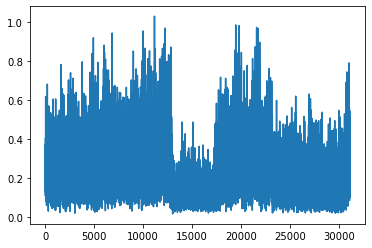

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
tf.compat.v1.disable_v2_behavior()

OT_books = ['Genesis', 'Exodus', 'Leviticus', 'Numbers', 'Deuteronomy', 'Joshua', 'Judges',
            'Ruth', '1 Samuel', '2 Samuel', '1 Kings', '2 Kings', '1 Chronicles', '2 Chronicles',
            'Ezra', 'Nehemiah', 'Esther', 'Job', 'Psalms', 'Proverbs', 'Ecclesiastes',
            'Song of Solomon', 'Isaiah', 'Jeremiah', 'Lamentations', 'Ezekiel', 'Daniel',
            'Hosea', 'Joel', 'Amos', 'Obadiah', 'Jonah', 'Micah', 'Nahum', 'Habakkuk',
            'Zephaniah', 'Haggai',    'Zechariah',    'Malachi']

NT_books = ['Matthew', 'Mark', 'Luke', 'John', 'Acts', 'Romans', '1 Corinthians',
            '2 Corinthians', 'Galatians', 'Ephesians', 'Philippians', 'Colossians',
            '1 Thessalonians', '2 Thessalonians', '1 Timothy', '2 Timothy', 'Titus', 'Philemon',
            'Hebrews', 'James', '1 Peter', '2 Peter', '1 John', '2 John', '3 John', 'Jude',
            'Revelation']

# 1 for OT and 0 for NT
def encode(line):
    res_vec = np.zeros((1), dtype = int)
    if data.iloc[line]['book'] in OT_books:
        res_vec[0] = 1
    elif data.iloc[line]['book'] in NT_books:
        res_vec[0] = 0
    return res_vec

features = vocabulary_size
categories = 66 #number of books

suff_feat = np.array(range(1,features+1))
np.random.shuffle(suff_feat)
print(suff_feat)
def vecto(x):
    ret = []
    for i in suff_feat:
        ret.append(x**i)#(x**i/ 7.**i)
    return ret

x = tf.compat.v1.placeholder(tf.float32, [None, features])
y_ = tf.compat.v1.placeholder(tf.float32, [None, 1])
W = tf.compat.v1.Variable(tf.zeros([features,1]))
b = tf.compat.v1.Variable(tf.zeros([1]))
y = tf.matmul(x,W) + b
loss = tf.reduce_mean(tf.pow(y - y_, 2)) # + 0.1*tf.nn.l2_loss(W)
update = tf.compat.v1.train.GradientDescentOptimizer(0.001).minimize(loss)

#[book,words]

data_x = np.array([convert2vec(data.iloc[i]['text']) for i in range(0,len(data['text']))])
data_y = np.array([encode(i) for i in range(0,len(data['text']))])

sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())


def h(x,w,b):
    ans = 1 / (1+np.exp(-(np.dot(x,w) + b)))
    return ans

w = np.zeros(9421)

alpha = 0.001
#h(data_x,w,b)
for iteration in range(10):
    sess.run(update, feed_dict = {x:data_x, y_:data_y})
    if iteration % 100 == 0 :
        print('Iteration:' , iteration , ' W:' , sess.run(W) , ' b:' , sess.run(b), ' loss:', loss.eval(session=sess, feed_dict = {x:data_x, y_:data_y}))

print('Prediction for 1,1:', np.matmul(np.array(convert2vec("In the beginning God created the heaven and the earth.")),sess.run(W)) + sess.run(b))

x_axis = np.arange(0,len(data['text']))#,0.1
# x_data = []
# for i in x_axis:
#     x_data.append(vecto(i))

# x_data = np.array(x_data)
x_data = np.array([convert2vec(data.iloc[i]['text']) for i in range(0,len(data['text']))])
print(x_data)
y_vals = np.matmul(x_data, sess.run(W)) + sess.run(b)
plt.plot(x_axis, y_vals)
plt.show()
# y_vals = np.matmul(data_x, sess.run(W)) + sess.run(b)
# plt.plot(x_axis, y_vals)
# plt.show()



#print(w,b)

the problem we solve here is a bit different from our main problem, instead of classify to a book we classify every verse to a testament.
it seems that here we have over fitting due to too many features,
so the linear regression is not the best model for our problem.

In [8]:
for i in range(0,len(y_vals)):
    if y_vals[i] < 0.5:
        y_vals[i] = 0;
    else:
        y_vals[i] = 1;
        
print("Accuracy: ", accuracy_score(y_vals,data_y))

Accuracy:  0.8589801298951836


In [10]:
print(classification_report(y_vals,data_y))

              precision    recall  f1-score   support

         0.0       0.51      0.90      0.65      4503
         1.0       0.98      0.85      0.91     26599

    accuracy                           0.86     31102
   macro avg       0.74      0.87      0.78     31102
weighted avg       0.91      0.86      0.87     31102



In [6]:
data_y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [7]:
data_x

array([[1, 3, 1, ..., 0, 0, 0],
       [0, 6, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 5, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [7]:
import random
rand = random.randrange(0, 31000)
rand

1286